In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Análise Individul das Variáveis

### Heart Disease: Correspondentes que reportaram doença arterial coronariana ou infarto do miocárdio (TARGET)

In [14]:
round((df['HeartDisease'].value_counts()/ len(df['HeartDisease']))*100,1)

HeartDisease
No     91.4
Yes     8.6
Name: count, dtype: float64

In [15]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [16]:
dict = {'Yes':1,
        'No':0}
df['HeartDisease'] = df['HeartDisease'].map(dict)

Text(0.5, 1.0, 'Distribuição da população')

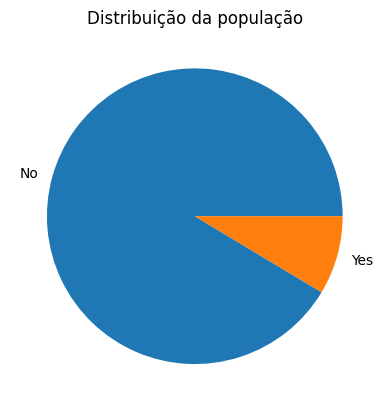

In [17]:
label = ['No', 'Yes']
plt.pie(round((df['HeartDisease'].value_counts()/ len(df['HeartDisease']))*100,1), labels=label)
plt.title('Distribuição da população')

### BMI: Equivalente ao IMC

In [9]:
#Levando em consideração que a base está trabalhando apenas com pacientes adultos, conversei com um amigo médico que 
#definiu que um IMC abaixo de 14 é muito baixo e acima de 60 pouco provável

In [10]:
def class_BMI(row):
    if row['BMI']<14:
        return "Resultado Estranho: Muito Baixo"
    elif row ['BMI']>=14 and row['BMI']<=18.49:
        return "Baixo Peso"
    elif row['BMI']>=18.5 and row['BMI']<=24.99:
        return "Normal"
    elif row['BMI']>=25 and row['BMI']<=29.99:
        return "SobrePeso"
    elif row['BMI']>=30 and row['BMI']<=34.99:
        return "Obesidade I"
    elif row['BMI']>=35 and row['BMI']<=39.99:
        return "Obesidade II"
    elif row['BMI']>=40 and row['BMI']<60:
        return "Obesidade III"
    elif row['BMI']>=60:
        return "Resultado Estranho: Muito Alto"
    else:
        return "ERRO"

In [11]:
df_copy = df.copy()

In [12]:
df_copy['Class_BMI'] = df_copy.apply(class_BMI, axis=1)

In [13]:
total = df_copy.groupby('Class_BMI').size().reset_index()
total = total.rename(columns={0:"Contagem_Total"})

target = df_copy[df_copy['HeartDisease']==1].groupby('Class_BMI').size().reset_index()
target = target.rename(columns={0:"Contagem_Target"})

nova_ordem = ['Resultado Estranho: Muito Baixo', 'Baixo Peso', 'Normal', 'SobrePeso', 'Obesidade I', 'Obesidade II', 'Obesidade III', 'Resultado Estranho: Muito Alto']
total = total.merge(target, how='left',on='Class_BMI')
total['Class_BMI'] = pd.Categorical(total['Class_BMI'], categories=nova_ordem, ordered=True)
total = total.sort_values('Class_BMI')

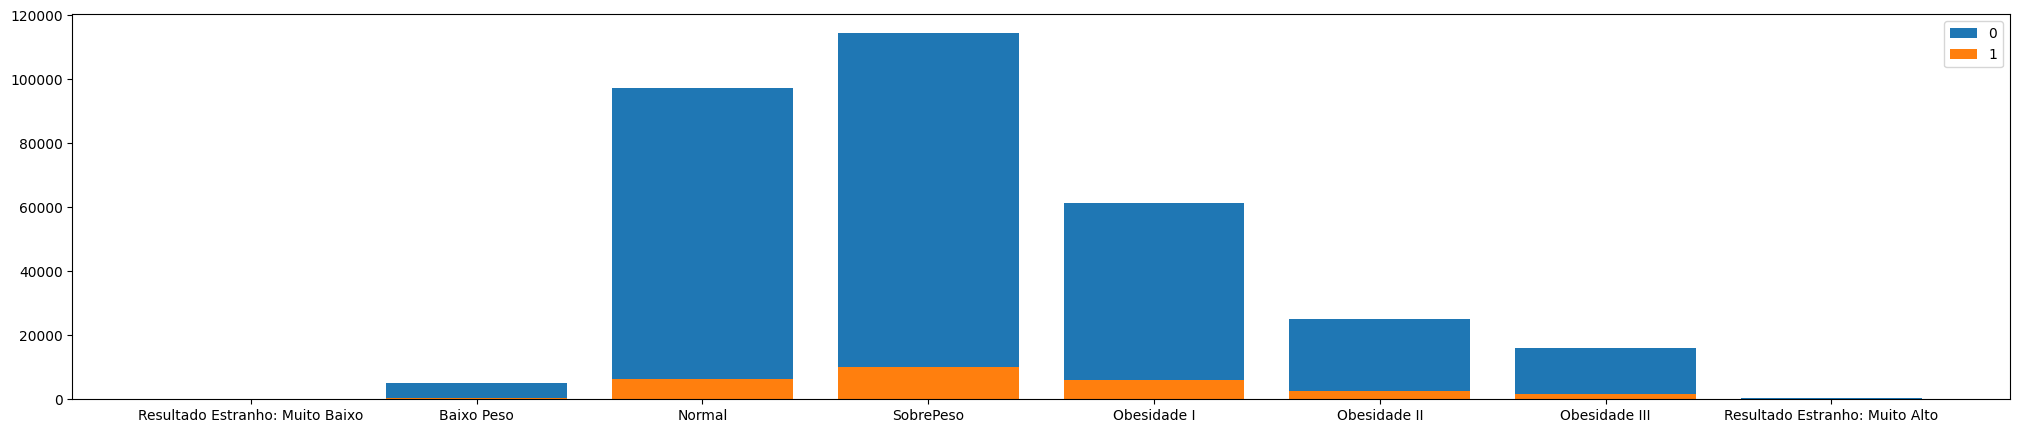

In [14]:
plt.figure(figsize=(25,5))
plt.bar(total['Class_BMI'],total['Contagem_Total'], label='Total')
plt.bar(total['Class_BMI'],total['Contagem_Target'], label='target')
plt.legend(label)

In [15]:
total['Percentual'] =( total['Contagem_Target']/total['Contagem_Total'])*100
total

,Class_BMI,Contagem_Total,Contagem_Target,Percentual
6,Resultado Estranho: Muito Baixo,119,12,10.084034
0,Baixo Peso,4991,389,7.794029
1,Normal,97331,6309,6.482005
7,SobrePeso,114512,9991,8.724850
2,Obesidade I,61345,6160,10.041568
3,Obesidade II,25112,2700,10.751832
4,Obesidade III,15893,1755,11.042597
5,Resultado Estranho: Muito Alto,492,57,11.585366


In [16]:
df_copy[df_copy['Class_BMI'].str.contains('Resultado')]['HeartDisease'].value_counts()

HeartDisease
0    542
1     69
Name: count, dtype: int64

<Axes: >

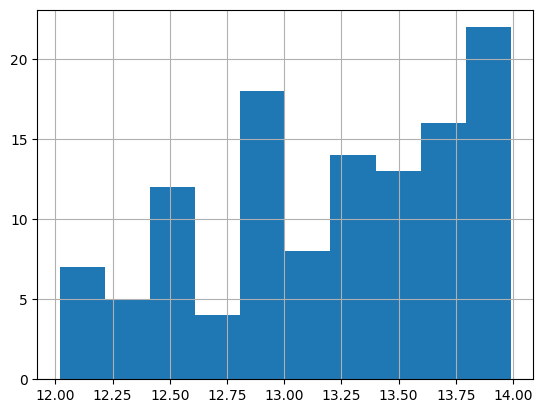

In [17]:
df_copy[df_copy['Class_BMI']=='Resultado Estranho: Muito Baixo']['BMI'].hist()

<Axes: >

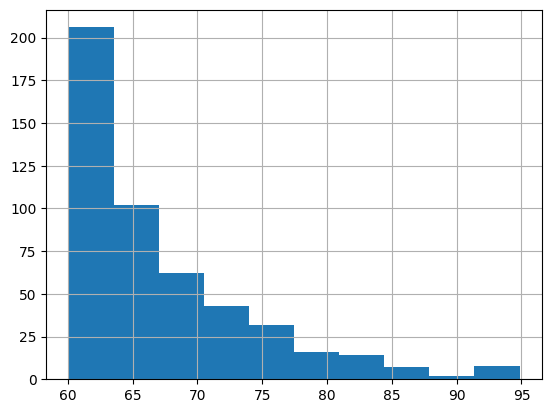

In [18]:
df_copy[df_copy['Class_BMI']=='Resultado Estranho: Muito Alto']['BMI'].hist()

In [19]:
df = df[(df['BMI']>=14) & (df['BMI']<=60)]

### Smoking: Flag de identificação com fumantes, pelo menos 100 cigarros durante a vida

In [20]:
round((df['Smoking'].value_counts()/ len(df['Smoking']))*100,1)

Smoking
No     58.8
Yes    41.2
Name: count, dtype: float64

In [21]:
df['Smoking'].value_counts()

Smoking
No     187534
Yes    131650
Name: count, dtype: int64

In [22]:
df['Smoking']= df['Smoking'].map(dict)

In [23]:
df[df['HeartDisease']==1]['Smoking'].value_counts()

Smoking
1    16008
0    11296
Name: count, dtype: int64

In [24]:
#58,6% dos que tiveram infarto fumavam

In [25]:
df[df['HeartDisease']==0]['Smoking'].value_counts()

Smoking
0    176238
1    115642
Name: count, dtype: int64

In [26]:
#Dentre os que não tiveram infarto, 39,6% fumavam

### AlcoholDrinking: Flag de identificação de consumo de bebida alcóolica, homens adultos que bebem mais de 14 drinks por semana ou mulheres que bebem mais que 7 drinks por semana.

In [27]:
round((df['AlcoholDrinking'].value_counts()/ len(df['AlcoholDrinking']))*100,1)

AlcoholDrinking
No     93.2
Yes     6.8
Name: count, dtype: float64

In [28]:
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     297454
Yes     21730
Name: count, dtype: int64

In [29]:
df['AlcoholDrinking']= df['AlcoholDrinking'].map(dict)

In [30]:
df[df['HeartDisease']==1]['AlcoholDrinking'].value_counts()

AlcoholDrinking
0    26173
1     1131
Name: count, dtype: int64

In [31]:
#Dentre os que tiveram infarto, 4,2% eram alcólatras

In [32]:
df[df['HeartDisease']==0]['AlcoholDrinking'].value_counts()

AlcoholDrinking
0    271281
1     20599
Name: count, dtype: int64

In [33]:
#Dentre os que não tiveram infarto, 7% eram alcólatras

In [34]:
df[df['AlcoholDrinking']==1]['Smoking'].value_counts()

Smoking
1    13378
0     8352
Name: count, dtype: int64

In [35]:
#Dentre aqueles que são identificados como alcóolatras, 61.56% fumam

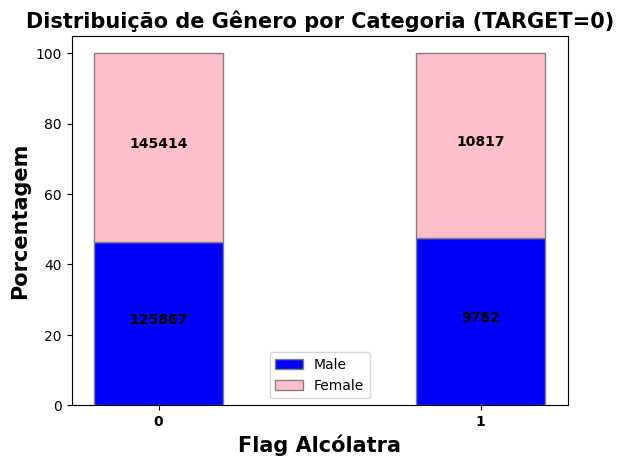

In [36]:
teste = df[df['HeartDisease']==0].groupby(['AlcoholDrinking','Sex']).size().reset_index()

teste = teste.pivot(index='AlcoholDrinking', columns='Sex', values=0)

total = teste['Male'] + teste['Female']
porcentagem_m = (teste['Male'] / total) * 100
porcentagem_f = (teste['Female'] / total) * 100

barWidth = 0.4
r = np.arange(len(teste.index))
plt.bar(r, porcentagem_m, color='blue', width=barWidth, edgecolor='grey', label='Male')
plt.bar(r, porcentagem_f, color='pink', width=barWidth, edgecolor='grey', label='Female', bottom=porcentagem_m)

for i in range(len(teste.index)):
    plt.text(r[i], porcentagem_m[i]/2, str(teste['Male'][i]), color='black', fontweight='bold', ha='center')
    plt.text(r[i], porcentagem_m[i] + porcentagem_f[i]/2, str(teste['Female'][i]), color='black', fontweight='bold', ha='center')

# Adicionando legendas e rótulos
plt.xlabel('Flag Alcólatra', fontweight='bold', fontsize=15)
plt.xticks(r, teste.index, fontweight='bold')
plt.ylabel('Porcentagem', fontweight='bold', fontsize=15)
plt.title('Distribuição de Gênero por Categoria (TARGET=0)', fontweight='bold', fontsize=15)
plt.legend()
plt.show()

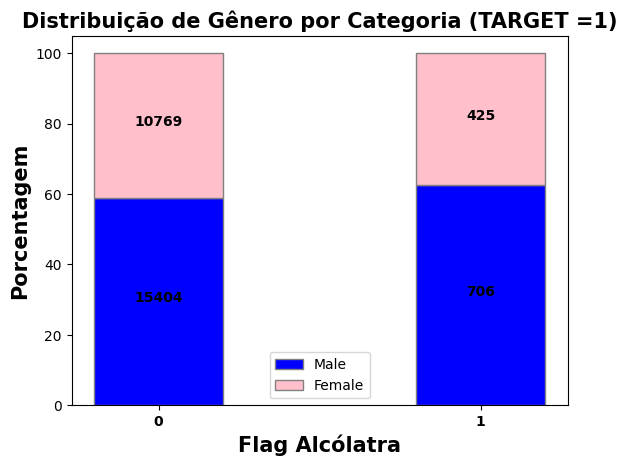

In [37]:
teste = df[df['HeartDisease']==1].groupby(['AlcoholDrinking','Sex']).size().reset_index()

teste = teste.pivot(index='AlcoholDrinking', columns='Sex', values=0)

total = teste['Male'] + teste['Female']
porcentagem_m = (teste['Male'] / total) * 100
porcentagem_f = (teste['Female'] / total) * 100

barWidth = 0.4
r = np.arange(len(teste.index))
plt.bar(r, porcentagem_m, color='blue', width=barWidth, edgecolor='grey', label='Male')
plt.bar(r, porcentagem_f, color='pink', width=barWidth, edgecolor='grey', label='Female', bottom=porcentagem_m)

for i in range(len(teste.index)):
    plt.text(r[i], porcentagem_m[i]/2, str(teste['Male'][i]), color='black', fontweight='bold', ha='center')
    plt.text(r[i], porcentagem_m[i] + porcentagem_f[i]/2, str(teste['Female'][i]), color='black', fontweight='bold', ha='center')

# Adicionando legendas e rótulos
plt.xlabel('Flag Alcólatra', fontweight='bold', fontsize=15)
plt.xticks(r, teste.index, fontweight='bold')
plt.ylabel('Porcentagem', fontweight='bold', fontsize=15)
plt.title('Distribuição de Gênero por Categoria (TARGET =1)', fontweight='bold', fontsize=15)
plt.legend()
plt.show()

### Stroke: Flag de identificação de pacientes que tiveram derrame cerebral

In [38]:
round((df['Stroke'].value_counts()/ len(df['Stroke']))*100,1)

Stroke
No     96.2
Yes     3.8
Name: count, dtype: float64

In [39]:
df['Stroke'].value_counts()

Stroke
No     307148
Yes     12036
Name: count, dtype: int64

In [40]:
df['Stroke']= df['Stroke'].map(dict)

In [41]:
df[df['HeartDisease']==1]['Stroke'].value_counts()

Stroke
0    22932
1     4372
Name: count, dtype: int64

In [42]:
#16% dos que tiveram infarto, também tiveram AVC

In [43]:
df[df['HeartDisease']==0]['Stroke'].value_counts()

Stroke
0    284216
1      7664
Name: count, dtype: int64

In [44]:
#2% dos que não infartaram tiveram AVC

### PhysicalHealth: Saúde Física, qtd de dias que pacientes tiveram problemas físicos no último mês

<Axes: >

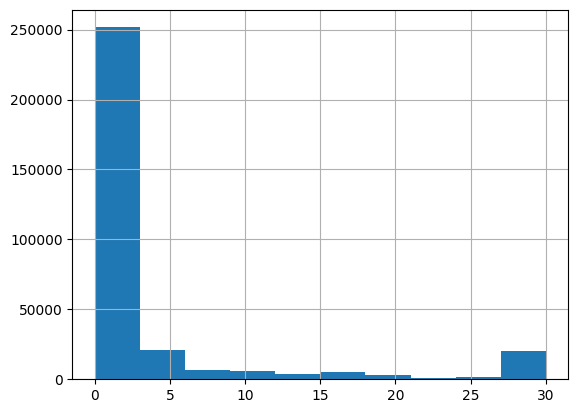

In [45]:
df['PhysicalHealth'].hist()

<BarContainer object of 31 artists>

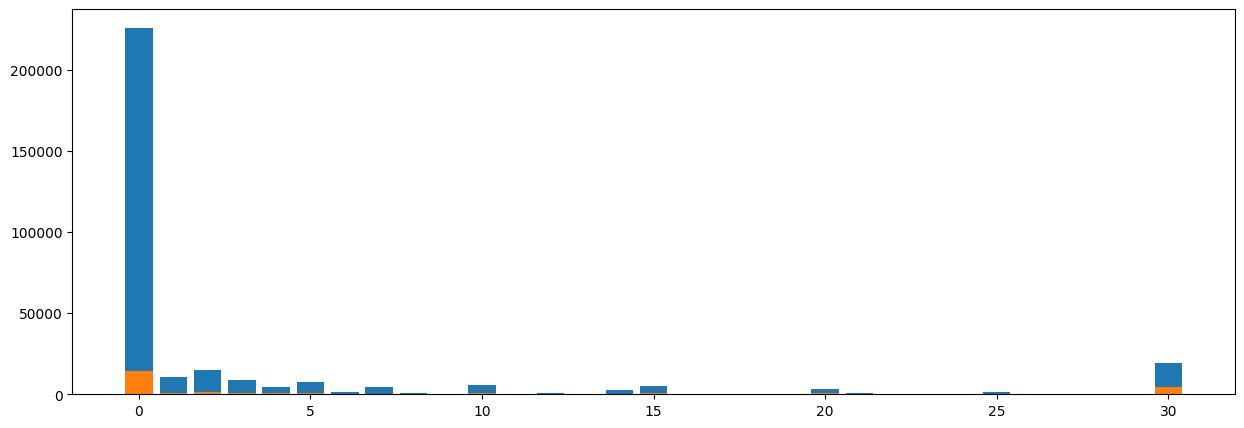

In [46]:
total = df.groupby('PhysicalHealth').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('PhysicalHealth').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='PhysicalHealth')

plt.figure(figsize=(15,5))
plt.bar(total['PhysicalHealth'], total['Total_Geral'])
plt.bar(total['PhysicalHealth'], total['Total_Target'])

### MentalHealth: Saúde Mental, qtd de dias que pacientes tiveram problemas mentais no último mês

<Axes: >

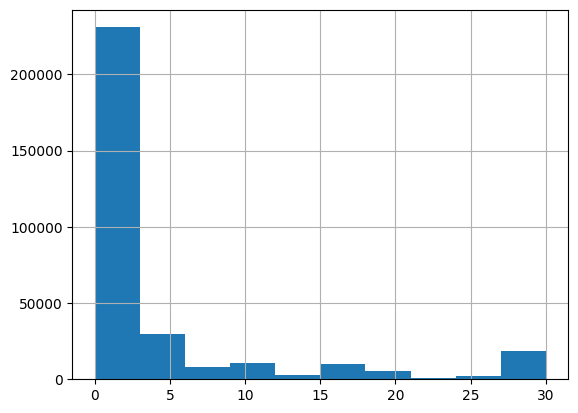

In [47]:
df['MentalHealth'].hist()

<BarContainer object of 31 artists>

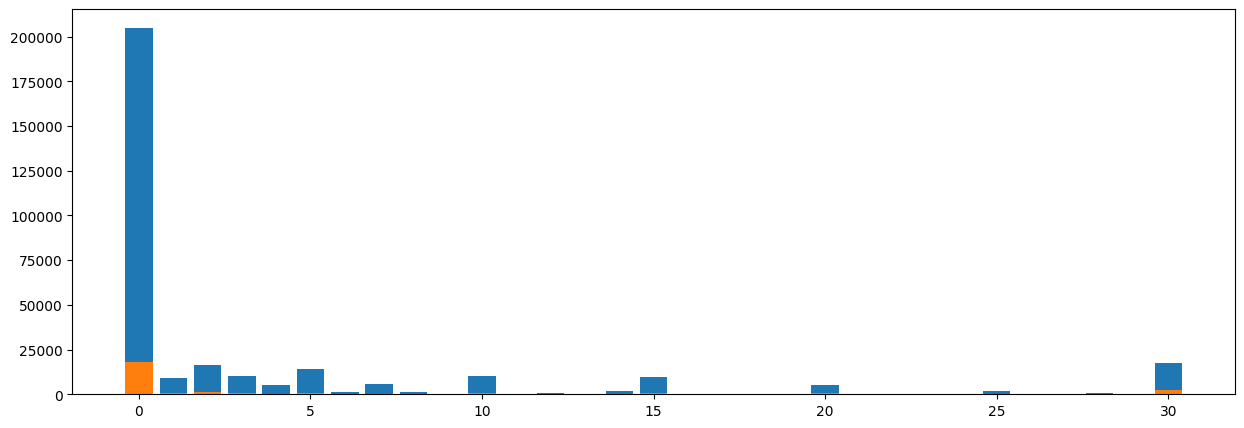

In [48]:
total = df.groupby('MentalHealth').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('MentalHealth').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='MentalHealth')

plt.figure(figsize=(15,5))
plt.bar(total['MentalHealth'], total['Total_Geral'])
plt.bar(total['MentalHealth'], total['Total_Target'])

### DiffWalking: Flag de identificação de pacientes que possuem dificuldade de andar ou subir escadas

In [4]:
round((df['DiffWalking'].value_counts()/ len(df['DiffWalking']))*100,1)

DiffWalking
No     86.1
Yes    13.9
Name: count, dtype: float64

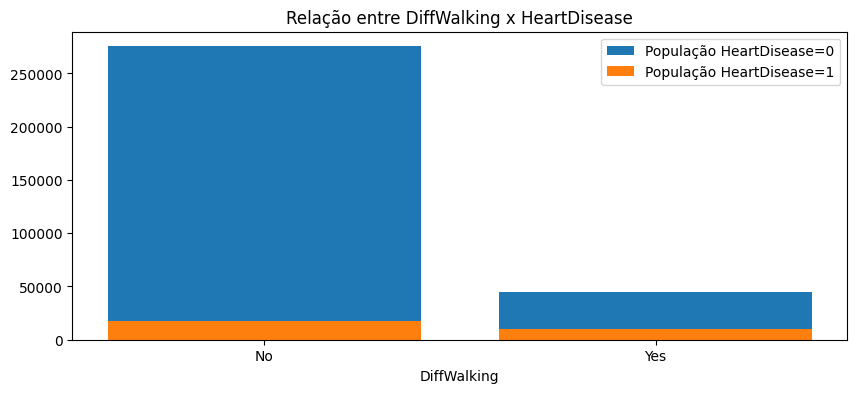

In [25]:
diff_walking = df.groupby('DiffWalking').size().reset_index()
diff_walking_hd = df[df['HeartDisease']==1].groupby('DiffWalking').size().reset_index()



plt.figure(figsize=(10,4))
plt.title('Relação entre DiffWalking x HeartDisease')
plt.xlabel('DiffWalking')
plt.bar(diff_walking['DiffWalking'], diff_walking[0], label='População HeartDisease=0')
plt.bar(diff_walking_hd['DiffWalking'], diff_walking_hd[0], label='População HeartDisease=1')
plt.legend()

In [12]:
diff_walking_hd

,DiffWalking,0
0,No,17345
1,Yes,10028


In [50]:
df['DiffWalking'].value_counts()

DiffWalking
No     275067
Yes     44117
Name: count, dtype: int64

In [51]:
df['DiffWalking'] = df['DiffWalking'].map(dict)

In [52]:
df[df['HeartDisease']==1]['DiffWalking'].value_counts()

DiffWalking
0    17325
1     9979
Name: count, dtype: int64

In [53]:
#Dos que tiveram infarto, 36,5% tiveram dificuldade de andar

In [54]:
df[df['HeartDisease']==0]['DiffWalking'].value_counts()

DiffWalking
0    257742
1     34138
Name: count, dtype: int64

In [55]:
#Dos que não tiveram infarto, 11,7% tiveram dificuldade de andar

<BarContainer object of 31 artists>

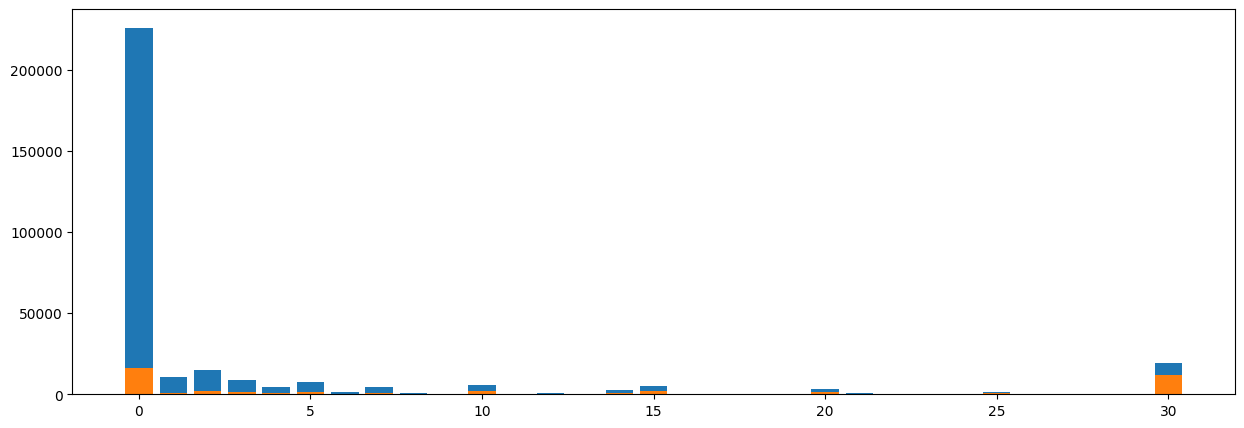

In [56]:
total = df.groupby('PhysicalHealth').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['DiffWalking']==1].groupby('PhysicalHealth').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='PhysicalHealth')

plt.figure(figsize=(15,5))
plt.bar(total['PhysicalHealth'], total['Total_Geral'])
plt.bar(total['PhysicalHealth'], total['Total_Target'])

### Sex: Gênero

In [57]:
round((df['Sex'].value_counts()/ len(df['Sex']))*100,1)

Sex
Female    52.5
Male      47.5
Name: count, dtype: float64

In [58]:
dict2 = {'Female':1,
         'Male':0}

df['Sex'] = df['Sex'].map(dict2)

In [59]:
df[df['HeartDisease']==1]['Sex'].value_counts()

Sex
0    16110
1    11194
Name: count, dtype: int64

In [60]:
df[df['HeartDisease']==0]['Sex'].value_counts()

Sex
1    156231
0    135649
Name: count, dtype: int64

In [61]:
#Mais da metade dos que tiveram infarto são do sexo Masculino

### AgeCategory: Faixa etária

In [9]:
round((df['AgeCategory'].value_counts()/ len(df['AgeCategory']))*100,1)

AgeCategory
65-69          10.7
60-64          10.5
70-74           9.7
55-59           9.3
50-54           7.9
80 or older     7.6
45-49           6.8
75-79           6.7
18-24           6.6
40-44           6.6
35-39           6.4
30-34           5.9
25-29           5.3
Name: count, dtype: float64

In [10]:
round((df[df['HeartDisease']==1]['AgeCategory'].value_counts()/ len(df[df['HeartDisease']==1]['AgeCategory']))*100,1)

AgeCategory
80 or older    19.9
70-74          17.7
65-69          15.0
75-79          14.8
60-64          12.2
55-59           8.0
50-54           5.1
45-49           2.7
40-44           1.8
35-39           1.1
30-34           0.8
25-29           0.5
18-24           0.5
Name: count, dtype: float64

In [11]:
round((df[df['HeartDisease']==0]['AgeCategory'].value_counts()/ len(df[df['HeartDisease']==0]['AgeCategory']))*100,1)

AgeCategory
60-64          10.4
65-69          10.3
55-59           9.4
70-74           9.0
50-54           8.2
45-49           7.2
18-24           7.2
40-44           7.0
35-39           6.9
80 or older     6.4
30-34           6.3
75-79           6.0
25-29           5.8
Name: count, dtype: float64

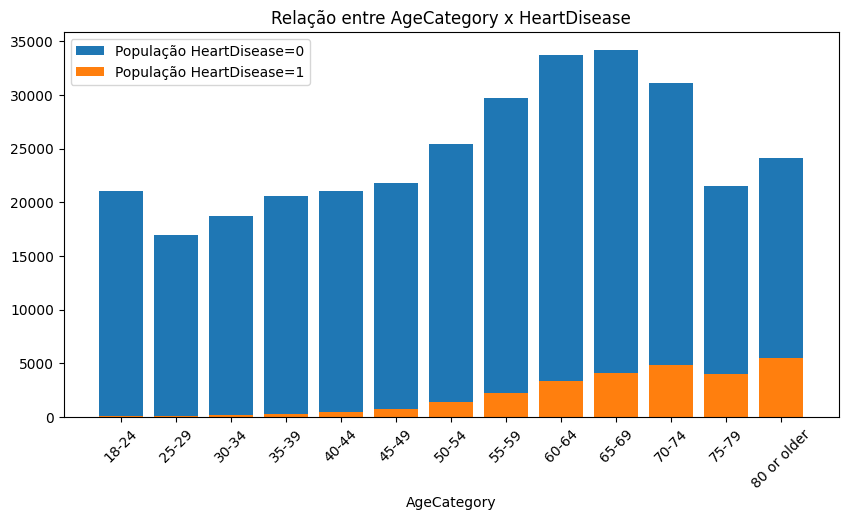

In [28]:
total = df.groupby('AgeCategory').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('AgeCategory').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='AgeCategory')

plt.figure(figsize=(10,5))
plt.title('Relação entre AgeCategory x HeartDisease')
plt.bar(total['AgeCategory'], total['Total_Geral'], label='População HeartDisease=0')
plt.bar(total['AgeCategory'], total['Total_Target'], label='População HeartDisease=1')
plt.xlabel('AgeCategory')
plt.xticks(rotation=45)
plt.legend()

In [66]:
dict3 = {'18-24': 0,
         '25-29':1,
         '30-34':2,
         '35-39':3,
         '40-44':4,
         '45-49':5,
         '50-54':6,
         '55-59':7,
         '60-64':8,
         '65-69':9,
         '70-74':10,
         '75-79':11,
         '80 or older':12}

df['AgeCategory'] = df['AgeCategory'].map(dict3)

### Race: Etnia

In [67]:
round((df['Race'].value_counts()/ len(df['Race']))*100,1)

Race
White                             76.7
Hispanic                           8.6
Black                              7.2
Other                              3.4
Asian                              2.5
American Indian/Alaskan Native     1.6
Name: count, dtype: float64

In [68]:
df[df['HeartDisease']==1]['Race'].value_counts()

Race
White                             22469
Black                              1717
Hispanic                           1433
Other                               884
American Indian/Alaskan Native      539
Asian                               262
Name: count, dtype: int64

<BarContainer object of 6 artists>

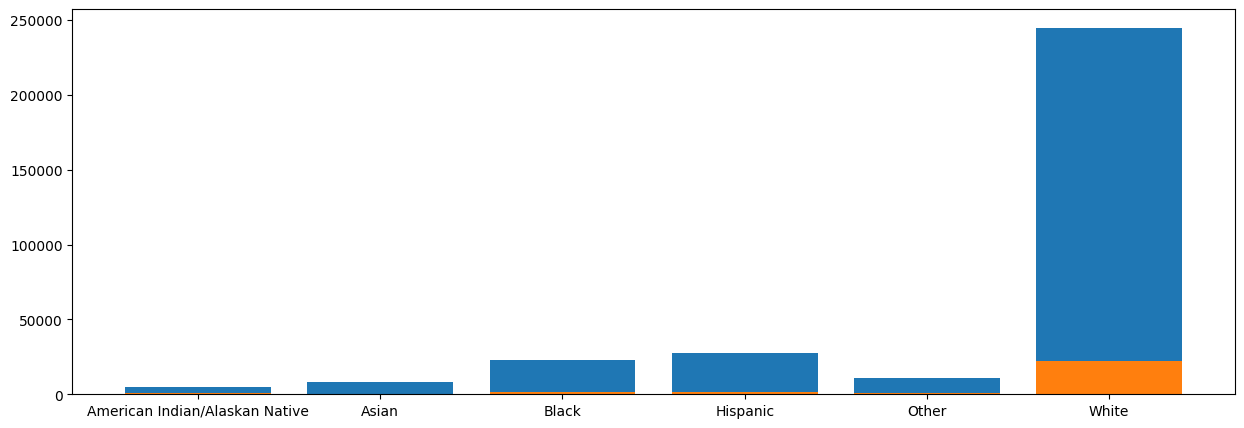

In [69]:
total = df.groupby('Race').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('Race').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='Race')

plt.figure(figsize=(15,5))
plt.bar(total['Race'], total['Total_Geral'])
plt.bar(total['Race'], total['Total_Target'])

In [70]:
dict4 = {
   'White':0,
   'Hispanic':1,
   'Black':2,
   'Asian':3,
   'American Indian/Alaskan Native':4,
   'Other':5
}

df['Race'] = df['Race'].map(dict4)

### Diabetic: Identificação de pacientes com diabetes

In [29]:
round((df['Diabetic'].value_counts()/ len(df['Diabetic']))*100,1)

Diabetic
No                         84.3
Yes                        12.8
No, borderline diabetes     2.1
Yes (during pregnancy)      0.8
Name: count, dtype: float64

In [30]:
df[df['HeartDisease']==1]['Diabetic'].value_counts()

Diabetic
No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: count, dtype: int64

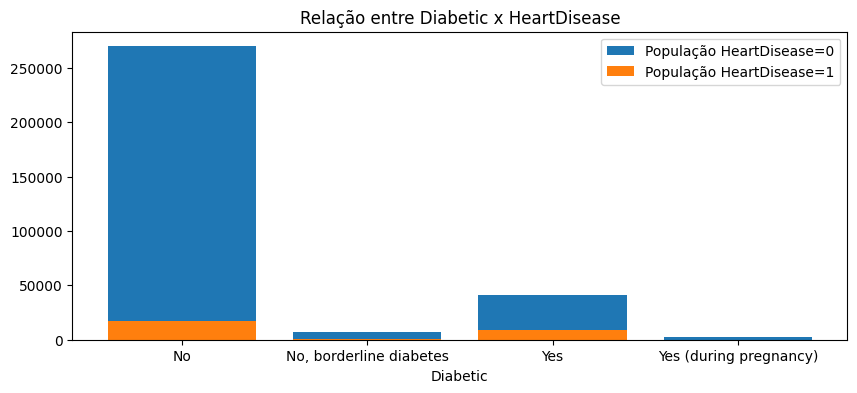

In [31]:
diff_walking = df.groupby('Diabetic').size().reset_index()
diff_walking_hd = df[df['HeartDisease']==1].groupby('Diabetic').size().reset_index()



plt.figure(figsize=(10,4))
plt.title('Relação entre Diabetic x HeartDisease')
plt.xlabel('Diabetic')
plt.bar(diff_walking['Diabetic'], diff_walking[0], label='População HeartDisease=0')
plt.bar(diff_walking_hd['Diabetic'], diff_walking_hd[0], label='População HeartDisease=1')
plt.legend()

In [73]:
#36% dos que tiveram infarto já tiveram um problema relacionado a diabetes

In [74]:
df[df['HeartDisease']==0]['Diabetic'].value_counts()

Diabetic
No                         251746
Yes                         31715
No, borderline diabetes      5970
Yes (during pregnancy)       2449
Name: count, dtype: int64

In [75]:
#13,8% dos que não tiveram infarto, já tiveram um problema relacionado a diabetes

In [76]:
dict5 = {
    'No':0,
    'Yes':1,
    'No, borderline diabetes':2,
    'Yes (during pregnancy)':3
}

df['Diabetic'] = df['Diabetic'].map(dict5)

### PhysicalActivity: Identificação de pacientes que realizam atividade física

In [77]:
round((df['PhysicalActivity'].value_counts()/ len(df['PhysicalActivity']))*100,1)

PhysicalActivity
Yes    77.6
No     22.4
Name: count, dtype: float64

In [78]:
((df[df['HeartDisease']==1]['PhysicalActivity'].value_counts())/len(df[df['HeartDisease']==1]))*100

PhysicalActivity
Yes    63.946674
No     36.053326
Name: count, dtype: float64

In [79]:
((df[df['HeartDisease']==0]['PhysicalActivity'].value_counts())/len(df[df['HeartDisease']==0]))*100

PhysicalActivity
Yes    78.858778
No     21.141222
Name: count, dtype: float64

In [80]:
df['PhysicalActivity'] = df['PhysicalActivity'].map(dict)

### GenHealth: Saúde em geral

In [81]:
round((df['GenHealth'].value_counts()/ len(df['GenHealth']))*100,1)

GenHealth
Very good    35.6
Good         29.1
Excellent    20.9
Fair         10.8
Poor          3.5
Name: count, dtype: float64

In [82]:
(df[df['HeartDisease']==1]['GenHealth'].value_counts()/len(df[df['HeartDisease']==1]))*100

GenHealth
Good         34.939936
Fair         25.882655
Very good    19.700410
Poor         13.997949
Excellent     5.479051
Name: count, dtype: float64

In [83]:
(df[df['HeartDisease']==0]['GenHealth'].value_counts()/len(df[df['HeartDisease']==0]))*100

GenHealth
Very good    37.137522
Good         28.574414
Excellent    22.367754
Fair          9.399753
Poor          2.520556
Name: count, dtype: float64

<BarContainer object of 5 artists>

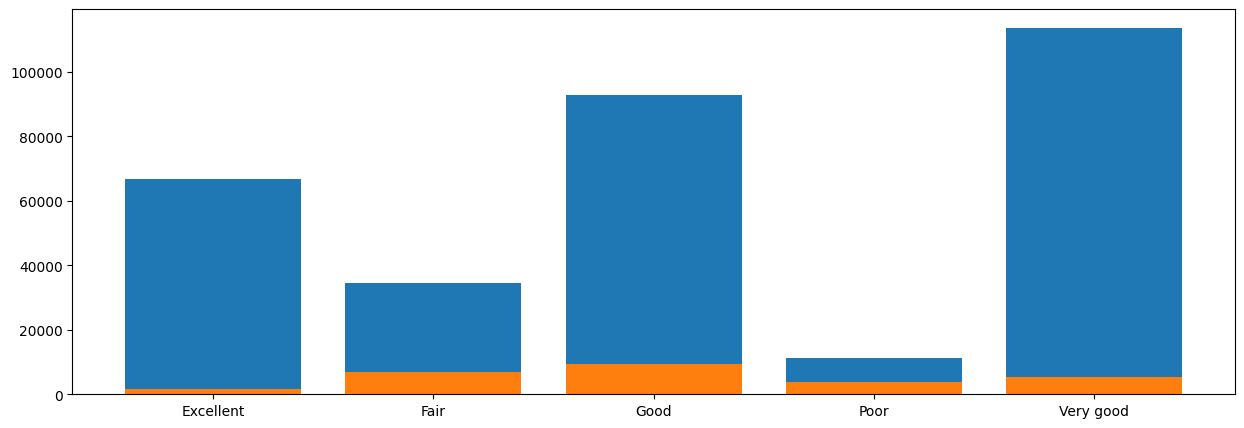

In [84]:
total = df.groupby('GenHealth').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('GenHealth').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='GenHealth')

plt.figure(figsize=(15,5))
plt.bar(total['GenHealth'], total['Total_Geral'])
plt.bar(total['GenHealth'], total['Total_Target'])

In [85]:
dict6 = {
    'Poor':0,
    'Fair':1,
    'Good':2,
    'Very good':3,
    'Excellent':4
}

df['GenHealth'] = df['GenHealth'].map(dict6)

### SleepTime: Média de quantas horas o paciente dorme por dia

<Axes: >

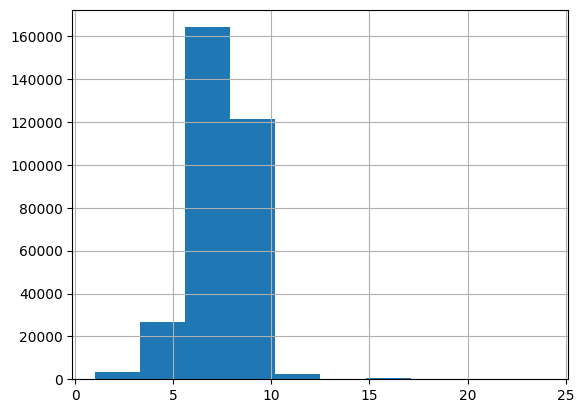

In [86]:
df['SleepTime'].hist()

In [87]:
df['SleepTime'].max()

24.0

In [88]:
df['SleepTime'].min()

1.0

<BarContainer object of 24 artists>

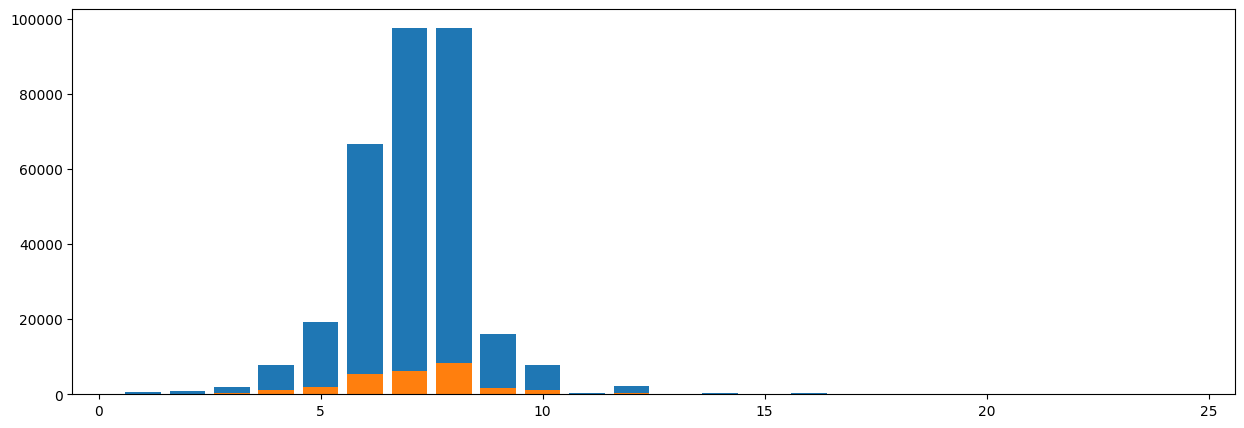

In [89]:
total = df.groupby('SleepTime').size().reset_index()
total = total.rename(columns={0:'Total_Geral'})

target = df[df['HeartDisease']==1].groupby('SleepTime').size().reset_index()
target = target.rename(columns={0:'Total_Target'})

total = total.merge(target, how='left', on='SleepTime')

plt.figure(figsize=(15,5))
plt.bar(total['SleepTime'], total['Total_Geral'])
plt.bar(total['SleepTime'], total['Total_Target'])

In [90]:
df[df['SleepTime']>14]['HeartDisease'].value_counts()

HeartDisease
0    549
1    104
Name: count, dtype: int64

In [91]:
df = df[(df['SleepTime']>=4) & (df['SleepTime']<=14)]

### Asthma: Flag de identificação de pacientes que possuem asma

In [92]:
round((df['Asthma'].value_counts()/ len(df['Asthma']))*100,1)

Asthma
No     86.7
Yes    13.3
Name: count, dtype: float64

In [93]:
(df[df['HeartDisease']==1]['Asthma'].value_counts()/len(df[df['HeartDisease']==1]))*100

Asthma
No     82.359778
Yes    17.640222
Name: count, dtype: float64

In [94]:
(df[df['HeartDisease']==0]['Asthma'].value_counts()/len(df[df['HeartDisease']==0]))*100

Asthma
No     87.148457
Yes    12.851543
Name: count, dtype: float64

In [95]:
df['Asthma'] = df['Asthma'].map(dict)

### KidneyDisease: Flag de identificação de pacientes que possuem doenças renais

In [96]:
round((df['KidneyDisease'].value_counts()/ len(df['KidneyDisease']))*100,1)

KidneyDisease
No     96.4
Yes     3.6
Name: count, dtype: float64

In [97]:
round((df[df['HeartDisease']==1]['KidneyDisease'].value_counts()/ len(df[df['HeartDisease']==1]))*100,1)

KidneyDisease
No     87.6
Yes    12.4
Name: count, dtype: float64

In [98]:
round((df[df['HeartDisease']==0]['KidneyDisease'].value_counts()/ len(df[df['HeartDisease']==0]))*100,1)

KidneyDisease
No     97.2
Yes     2.8
Name: count, dtype: float64

In [99]:
df['KidneyDisease'] = df['KidneyDisease'].map(dict)

### SkinCancer: Flag de identificação de pacientes com câncer de pele

In [100]:
round((df['SkinCancer'].value_counts()/ len(df['SkinCancer']))*100,1)

SkinCancer
No     90.6
Yes     9.4
Name: count, dtype: float64

In [101]:
df['SkinCancer'] = df['SkinCancer'].map(dict)

### Análises Estatísticas

In [102]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


<Axes: >

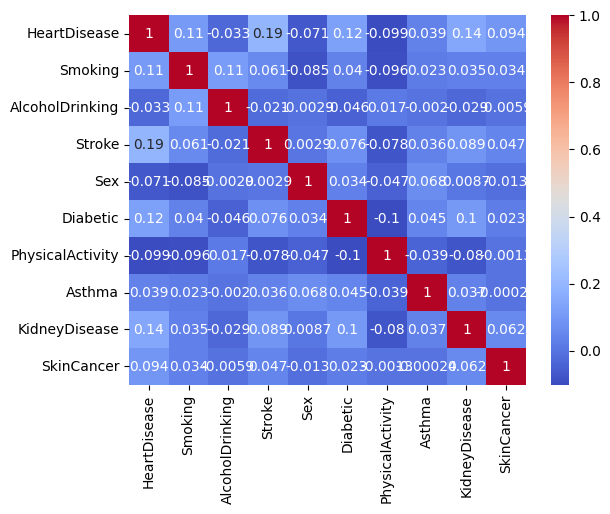

In [103]:
var_bin = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

corr_matrix = df[var_bin].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


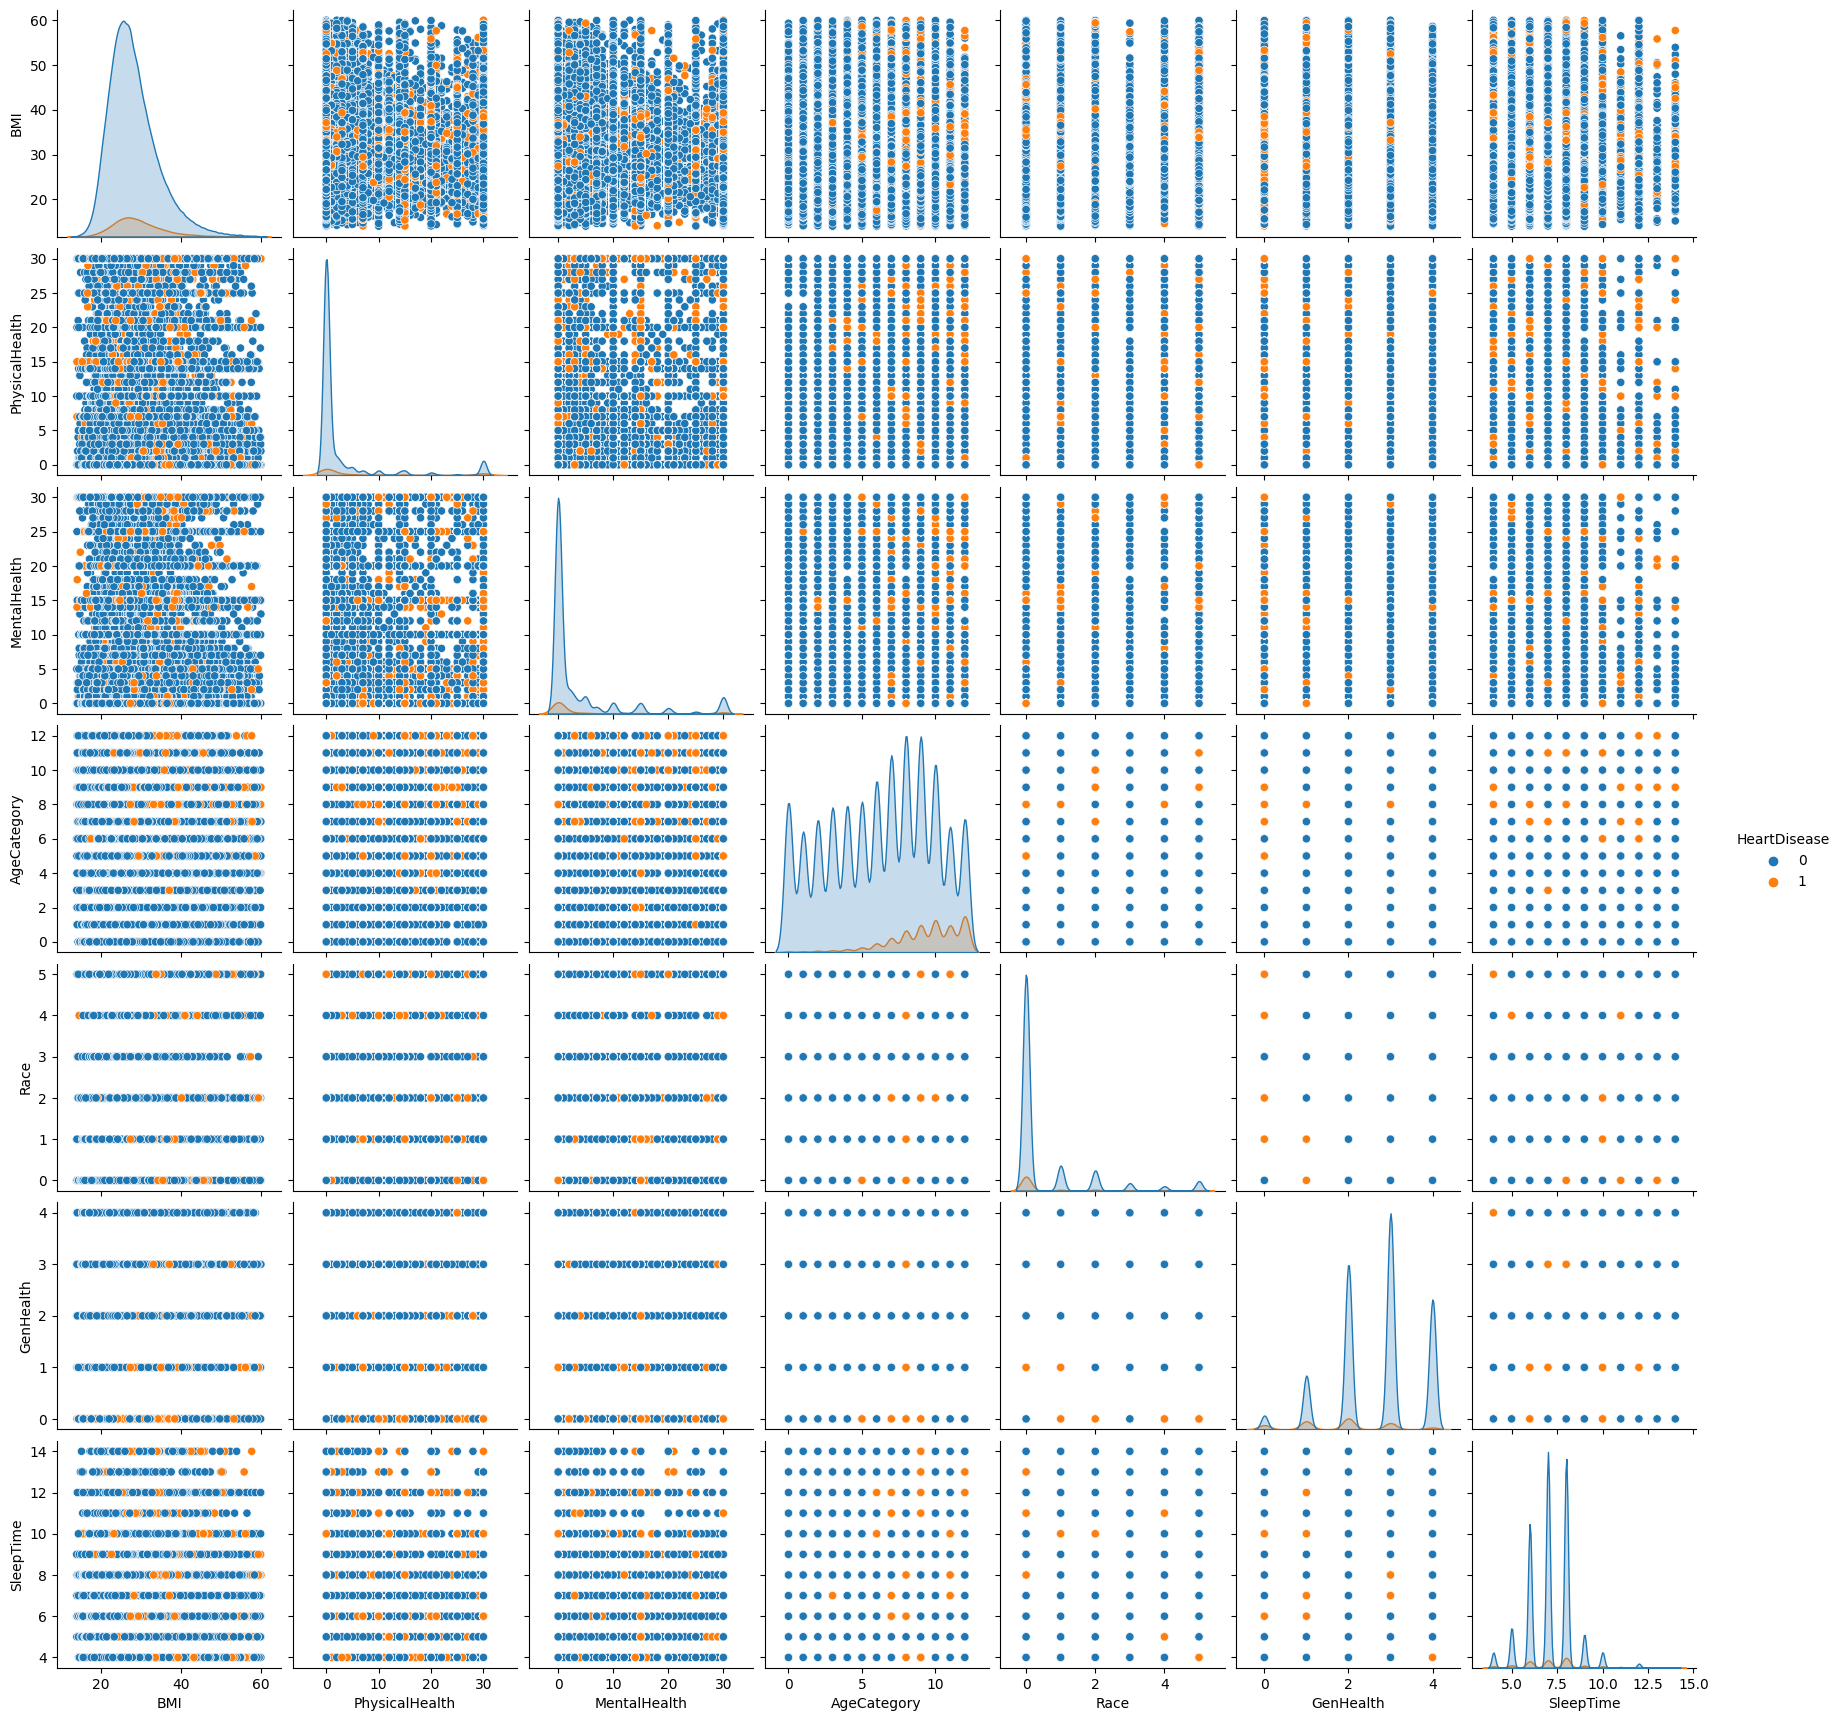

In [104]:
var_num = ['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','GenHealth','SleepTime']

new_df_test = df[var_num]

sns.pairplot(new_df_test,hue='HeartDisease')
plt.show()

### Bayes

In [105]:
#Probabilidade dele Fumar dado que Infartou e a Probabilidade dele Fumar dado que não infartou
df[df['HeartDisease'] == 1]['Smoking'].sum()/len(df[df['HeartDisease'] == 1]),df[df['HeartDisease'] == 0]['Smoking'].sum()/len(df[df['HeartDisease'] == 0])


(0.58499550089982, 0.3951079366069541)

In [106]:
#Probabilidade dele ter IMC>25 dado que Infartou e a Probabilidade dele ter IMC>25  dado que não infartou
df[(df['HeartDisease']==1)&(df['BMI']>25)]['BMI'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease']==0)&(df['BMI']>25)]['BMI'].count()/len(df[df['HeartDisease'] == 0])

(0.7538617276544691, 0.6707699558827097)

In [107]:
#Probabilidade dele ser Alcólatra dado que Infartou e a Probabilidade dele ser Alcólatra dado que não infartou
df[df['HeartDisease'] == 1]['AlcoholDrinking'].sum()/len(df[df['HeartDisease'] == 1]),df[df['HeartDisease'] == 0]['AlcoholDrinking'].sum()/len(df[df['HeartDisease'] == 0])


(0.04079184163167367, 0.07049062724182029)

In [108]:
#Probabilidade dele ter AVC dado que Infartou e a Probabilidade dele ter AVC dado que não infartou
df[df['HeartDisease'] == 1]['Stroke'].sum()/len(df[df['HeartDisease'] == 1]),df[df['HeartDisease'] == 0]['Stroke'].sum()/len(df[df['HeartDisease'] == 0])


(0.15724355128974205, 0.025870822633244268)

In [109]:
#Probabilidade dele ter Problemas físicos a mais de 15 dias dado que Infartou e a Probabilidade dele ter Problemas físicos a mais de 15 dias  dado que não infartou
df[(df['HeartDisease']==1)&(df['PhysicalHealth']>15)]['PhysicalHealth'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease']==0)&(df['PhysicalHealth']>15)]['PhysicalHealth'].count()/len(df[df['HeartDisease'] == 0])

(0.21007048590281943, 0.06606850136371985)

In [110]:
#Probabilidade dele ter Problemas psicológicos a mais de 15 dias dado que Infartou e a Probabilidade dele ter Problemas psicológicos a mais de 15 dias  dado que não infartou
df[(df['HeartDisease']==1)&(df['MentalHealth']>15)]['MentalHealth'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease']==0)&(df['MentalHealth']>15)]['MentalHealth'].count()/len(df[df['HeartDisease'] == 0])

(0.10947810437912417, 0.07860363404482427)

In [111]:
#Probabilidade dele ter dificuldade de andar dado que Infartou e a Probabilidade dele ter dificuldade de andar dado que não infartou
df[df['HeartDisease'] == 1]['DiffWalking'].sum()/len(df[df['HeartDisease'] == 1]),df[df['HeartDisease'] == 0]['DiffWalking'].sum()/len(df[df['HeartDisease'] == 0])


(0.35895320935812836, 0.11443117113557837)

In [112]:
#Probabilidade dele ser Homem dado que Infartou e a Probabilidade dele ser Homem dado que não infartou
df[(df['HeartDisease'] == 1) & (df['Sex']==0)]['Sex'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease'] == 0) & (df['Sex']==0)]['Sex'].count()/len(df[df['HeartDisease'] == 0])


(0.5914817036592681, 0.4645900696242233)

In [113]:
#Probabilidade dele ser maior que 40 anos dado que Infartou e a Probabilidade dele ser maior que 40 anos dado que não infartou
df[(df['HeartDisease'] == 1) & (df['AgeCategory']!=0)& (df['AgeCategory']!=1)& (df['AgeCategory']!=2)& (df['AgeCategory']!=3)]['AgeCategory'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease'] == 0) & (df['AgeCategory']!=0)& (df['AgeCategory']!=1)& (df['AgeCategory']!=2)& (df['AgeCategory']!=3)]['AgeCategory'].count()/len(df[df['HeartDisease'] == 0])


(0.9721805638872225, 0.7382558941462282)

In [114]:
#Probabilidade dele ser maior que 60 anos dado que Infartou e a Probabilidade dele ser maior que 60 anos dado que não infartou
df[(df['HeartDisease'] == 1) & (df['AgeCategory']!=0)& (df['AgeCategory']!=1)& (df['AgeCategory']!=2)& (df['AgeCategory']!=3)& (df['AgeCategory']!=4)& (df['AgeCategory']!=5)& (df['AgeCategory']!=6)& (df['AgeCategory']!=7)]['AgeCategory'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease'] == 0) & (df['AgeCategory']!=0)& (df['AgeCategory']!=1)& (df['AgeCategory']!=2)& (df['AgeCategory']!=3)& (df['AgeCategory']!=4)& (df['AgeCategory']!=5)& (df['AgeCategory']!=6)& (df['AgeCategory']!=7)]['AgeCategory'].count()/len(df[df['HeartDisease'] == 0])


(0.8008398320335933, 0.4204311919292737)

In [115]:
#Probabilidade dele ser diabético dado que Infartou e a Probabilidade dele ser diabético dado que não infartou
df[(df['HeartDisease'] == 1) & (df['Diabetic']==1)]['Diabetic'].count()/len(df[df['HeartDisease'] == 1]),  df[(df['HeartDisease'] == 0) & (df['Diabetic']==1)]['Diabetic'].count()/len(df[df['HeartDisease'] == 0])


(0.3245725854829034, 0.10778065423896808)

In [116]:
#Probabilidade dele avaliar a saúde como boa dado que Infartou e a Probabilidade dele avaliar a saúde como boa dado que não infartou
df[(df['HeartDisease'] == 1) & (df['GenHealth']==2)]['GenHealth'].count()/len(df[df['HeartDisease'] == 1]),  df[(df['HeartDisease'] == 0) & (df['GenHealth']==2)]['GenHealth'].count()/len(df[df['HeartDisease'] == 0])


(0.3530668866226755, 0.28573309905769906)

In [117]:
#Probabilidade dele dormir menos que 8h  dado que Infartou e a Probabilidade dele dormir menos que 8h   dado que não infartou
df[(df['HeartDisease']==1)&(df['SleepTime']<8)]['SleepTime'].count()/len(df[df['HeartDisease'] == 1]),df[(df['HeartDisease']==0)&(df['SleepTime']<8)]['SleepTime'].count()/len(df[df['HeartDisease'] == 0])

(0.559500599880024, 0.6103088210321297)

In [118]:
#Probabilidade dele ter asma dado que Infartou e a Probabilidade dele ter asma dado que não infartou
df[(df['HeartDisease'] == 1) & (df['Asthma']==1)]['Asthma'].count()/len(df[df['HeartDisease'] == 1]),  df[(df['HeartDisease'] == 0) & (df['Asthma']==1)]['Asthma'].count()/len(df[df['HeartDisease'] == 0])


(0.17640221955608879, 0.1285154341203747)

In [119]:
#Probabilidade deleter doenças renais dado que Infartou e a Probabilidade deleter doenças renais dado que não infartou
df[(df['HeartDisease'] == 1) ]['KidneyDisease'].sum()/len(df[df['HeartDisease'] == 1]),  df[(df['HeartDisease'] == 0) ]['KidneyDisease'].sum()/len(df[df['HeartDisease'] == 0])


(0.1244751049790042, 0.028033366949807487)

In [120]:
#Probabilidade deleter doenças renais dado que Infartou e a Probabilidade deleter doenças renais dado que não infartou
df[(df['HeartDisease'] == 1) ]['SkinCancer'].sum()/len(df[df['HeartDisease'] == 1]),  df[(df['HeartDisease'] == 0) ]['SkinCancer'].sum()/len(df[df['HeartDisease'] == 0])


(0.1833008398320336, 0.0852090979348395)

### QUI QUADRADO

In [164]:
from scipy.stats import chi2_contingency

populacao_hd_true = df[df['HeartDisease']==1]['SleepTime']
populacao_hd_false = df[df['HeartDisease']==0]['SleepTime']
#
observed = [ [np.count_nonzero(populacao_hd_true >8 ),np.count_nonzero(populacao_hd_true <8 )],
            [np.count_nonzero(populacao_hd_false >8),np.count_nonzero(populacao_hd_false <8)]
]

chi2, p, dof, expected = chi2_contingency(observed)
p

1.1611717323929343e-161

In [145]:
observed

[[11069, 15603], [174541, 114008]]

In [132]:
df[df['HeartDisease']==1]['Smoking'].value_counts()

Smoking
1    15603
0    11069
Name: count, dtype: int64

In [121]:
df.to_pickle(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\data_pre_processed.pkl')